# PPAI - USE CASE 2 - PREDICTING LOAN DEFAULTS

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
import pandas as pd

real_data = pd.read_csv('loan_defaults.csv')

real_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,has_missed_loans
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,False
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,False
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,True


### Understanding our data

In [4]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

As you can see, this table contains information about credit loan defaults which
includes, among other things:

-   Id
-   Gender 
-   Nr of Children 
-   Property or Car Ownership
-   Income
-   Professional Activity
-   Educational Level
-   Family Status
-   Type of Property
-   Days since birth
-   Days employed
-   Occupation type
-   Family members

You will notice that there is data with the following characteristics:

-   There are float, integer, boolean and categorical  values.
-   There is one variable with missing data (Occupation Type).

In [8]:
real_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


### Key Features

- ID is the primary Key.
- Our data contains only individuals with more than 18 years old, which makes sense because we didn't expect to find individuals with less than 18 years old with credits.
- Unemployed clients do not have a work phone.
- All clients have income information
- Individuals might live with their parents and own a house, live in a municipal or rented apartment, so there are not constraints related with the housing type.
- The number of family members might not be equal or higher than the number of children if the parents are not living with their children.
- We can have a client with a default but without owning a house or a car.
- Occupation is missing for individuals unemployed.


## Build a model to predict credit default using the original dataset

#### Prepare dataset

In [9]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [10]:
real_data['has_missed_loans'].value_counts()

False    32002
True      4455
Name: has_missed_loans, dtype: int64

In [11]:
real_data['has_missed_loans'].replace({True:1, False:0}, inplace=True)

In [12]:
real_data['has_missed_loans'].astype(int)

0        0
1        0
2        0
3        0
4        1
        ..
36452    0
36453    0
36454    0
36455    0
36456    0
Name: has_missed_loans, Length: 36457, dtype: int64

In [13]:
real_data['has_missed_loans'].value_counts()

0    32002
1     4455
Name: has_missed_loans, dtype: int64

In [14]:
real_data=pd.get_dummies(real_data)

In [15]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   CNT_CHILDREN                                       36457 non-null  int64  
 2   AMT_INCOME_TOTAL                                   36457 non-null  float64
 3   DAYS_BIRTH                                         36457 non-null  int64  
 4   DAYS_EMPLOYED                                      36457 non-null  int64  
 5   FLAG_MOBIL                                         36457 non-null  int64  
 6   FLAG_WORK_PHONE                                    36457 non-null  int64  
 7   FLAG_PHONE                                         36457 non-null  int64  
 8   FLAG_EMAIL                                         36457 non-null  int64  
 9   CNT_FA

In [17]:
real_data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
real_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,...,0.170365,0.004800,0.082618,0.033107,0.009436,0.002167,0.095592,0.004142,0.016238,0.004773
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,...,0.375958,0.069118,0.275308,0.178920,0.096680,0.046501,0.294035,0.064225,0.126392,0.068921
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analyse correlations between variables

In [19]:
correlations_real= real_data.corr()

In [20]:
correlations_real

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
ID,1.000000,0.028878,-0.017667,0.056016,-0.038043,NaN,0.079215,0.009879,-0.046979,0.026624,...,0.000148,0.008097,-0.002743,0.014370,0.014616,0.012489,0.007745,0.006347,0.005772,0.035343
CNT_CHILDREN,0.028878,1.000000,0.033691,0.339357,-0.229379,NaN,0.048091,-0.016291,0.015960,0.889114,...,0.037378,0.000906,0.047228,0.002191,0.004958,0.004772,0.041262,0.009218,-0.004896,0.010789
AMT_INCOME_TOTAL,-0.017667,0.033691,1.000000,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,0.023750,...,-0.030680,-0.036002,0.272512,-0.037397,0.011677,0.027842,-0.037372,-0.011789,-0.012178,-0.020736
DAYS_BIRTH,0.056016,0.339357,0.067908,1.000000,-0.616213,NaN,0.179054,-0.028659,0.105625,0.304020,...,0.145276,0.014315,0.054658,0.004301,0.018760,0.010206,0.151254,0.010768,-0.023114,0.042869
DAYS_EMPLOYED,-0.038043,-0.229379,-0.168611,-0.616213,1.000000,NaN,-0.242869,-0.007233,-0.085648,-0.221241,...,-0.204054,-0.031023,-0.135422,-0.085357,-0.044123,-0.021001,-0.144442,-0.028989,-0.057027,-0.030672
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.079215,0.048091,-0.037746,0.179054,-0.242869,NaN,1.000000,0.311644,-0.034838,0.064527,...,0.039674,0.023296,0.042367,0.007993,-0.001073,-0.001153,0.029920,0.007098,0.004927,0.025482
FLAG_PHONE,0.009879,-0.016291,0.017245,-0.028659,-0.007233,NaN,0.311644,1.000000,0.010455,-0.004221,...,-0.031696,0.002966,0.002627,-0.009697,0.010942,0.004799,0.007483,0.003263,-0.025478,-0.004624
FLAG_EMAIL,-0.046979,0.015960,0.086681,0.105625,-0.085648,NaN,-0.034838,0.010455,1.000000,0.014619,...,-0.026108,-0.010695,0.032338,0.010571,0.018005,0.003946,0.002389,0.005159,0.007506,-0.005030
CNT_FAM_MEMBERS,0.026624,0.889114,0.023750,0.304020,-0.221241,NaN,0.064527,-0.004221,0.014619,1.000000,...,0.035565,0.010565,0.061338,0.003610,-0.014399,0.012502,0.036980,0.002358,-0.001305,-0.002851


In [21]:
correlations_real[correlations_real>0.8]

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.889114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_PHONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_FAM_MEMBERS,NaN,0.889114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After analysing the correlations we have decided to remove the variables with a correlation higher 0.8 in order to avoid multicolinearity issues. So we have decided to remove the variable CNT_CHILDREN because it has a correlation of 0.89 with the variable CNT_FAM_MEMBERS. The variable NAME_INCCOME_TYPE_PENSIONER is also higly correlated (0.99) with the variable DAYS_EMPLOYED so we decide to remove the variable NAME_INCOME_TYPE_PENSIONER.

We also will exclude the variable FLAG_MOBIL because this variable is always 1.

#### Define the target

In [22]:
y_real = real_data['has_missed_loans']

In [23]:
y_real

0        0
1        0
2        0
3        0
4        1
        ..
36452    0
36453    0
36454    0
36455    0
36456    0
Name: has_missed_loans, Length: 36457, dtype: int64

#### Define explanatory the variables

In [28]:
x_real = real_data.drop(columns=['has_missed_loans','FLAG_MOBIL', 'CNT_CHILDREN', 'NAME_INCOME_TYPE_Pensioner'])

In [29]:
x_real

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,427500.0,-12005,-4542,1,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5008805,427500.0,-12005,-4542,1,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5008806,112500.0,-21474,-1134,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,5008808,270000.0,-19110,-3051,0,1,1,1.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,270000.0,-19110,-3051,0,1,1,1.0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,315000.0,-17348,-2420,0,0,0,2.0,0,1,...,0,0,1,0,0,0,0,0,0,0
36453,5149834,157500.0,-12387,-1325,0,1,1,2.0,1,0,...,0,0,0,1,0,0,0,0,0,0
36454,5149838,157500.0,-12387,-1325,0,1,1,2.0,1,0,...,0,0,0,1,0,0,0,0,0,0
36455,5150049,283500.0,-17958,-655,0,0,0,2.0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### Define the training and test datasets

In [30]:
from sklearn.model_selection import train_test_split

x_train_real, x_test_real, y_train_real, y_test_real = train_test_split(x_real, y_real, test_size = 0.4, random_state=42)

In [32]:
x_train_real

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
34627,5146340,135000.0,-9275,-493,0,0,0,1.0,0,1,...,1,0,0,0,0,0,0,0,0,0
29597,5117976,144000.0,-9778,-857,1,1,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
24447,5099779,252000.0,-15227,-5300,1,1,0,2.0,0,1,...,1,0,0,0,0,0,0,0,0,0
31668,5132938,157500.0,-12676,-1350,0,0,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,1
23609,5095965,135000.0,-16395,-7371,1,0,0,2.0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,5067139,112500.0,-23400,365243,0,1,1,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
6265,5029193,135000.0,-15532,-8256,0,0,0,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
11284,5047710,76500.0,-17782,-3291,1,1,0,2.0,1,0,...,0,0,1,0,0,0,0,0,0,0
860,5009886,157500.0,-21635,365243,0,1,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_train_real

34627    0
29597    0
24447    0
31668    0
23609    0
        ..
16850    0
6265     1
11284    0
860      0
15795    0
Name: has_missed_loans, Length: 21874, dtype: int64

In [34]:
x_test_real

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
21900,5091261,202500.0,-16834,-1692,0,0,0,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0
24293,5096963,675000.0,-18126,-948,0,1,0,2.0,0,1,...,0,0,1,0,0,0,0,0,0,0
19633,5087880,234000.0,-21967,-5215,0,0,1,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2496,5021949,445500.0,-12477,-456,0,0,0,2.0,1,0,...,0,0,1,0,0,0,0,0,0,0
25932,5105705,225000.0,-12155,-667,0,0,0,2.0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20023,5088840,612000.0,-12563,-3715,0,0,1,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
20178,5090896,117000.0,-22052,365243,0,1,0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
25916,5105688,90000.0,-20663,365243,0,0,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
23919,5096392,391500.0,-21897,-3810,1,1,1,1.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [35]:
y_test_real

21900    1
24293    1
19633    0
2496     0
25932    1
        ..
20023    0
20178    0
25916    0
23919    0
3277     0
Name: has_missed_loans, Length: 14583, dtype: int64

#### Multivariate Logistic Regression

In [36]:
!pip install ipympl

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached ipympl-0.9.1-py2.py3-none-any.whl (508 kB)
  Using cached ipywidgets-7.7.1-py2.py3-none-any.whl (123 kB)
  Using cached jupyterlab_widgets-1.1.1-py3-none-any.whl (245 kB)
  Using cached widgetsnbextension-3.6.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.1
    Uninstalling widgetsnbextension-3.5.1:
      Successfully uninstalled widgetsnbextension-3.5.1
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.5.1
    Uninstalling ipywidgets-7.5.1:
      Successful

In [37]:
%matplotlib widget
from sklearn.linear_model import LogisticRegression


mlr1 = LogisticRegression()
mlr1.fit(x_train_real, y_train_real)
y_pred_real = mlr1.predict(x_test_real)

In [38]:
y_pred_real

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
mlr1.classes_

array([0, 1])

#### Model Evaluation Measures

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

def evaluatemodelscore(tt, pred):
    mae = mean_absolute_error(tt, pred)
    mse = mean_squared_error(tt, pred)
    rmse = mean_squared_error(tt, pred, squared=False)
    accuracy = accuracy_score (tt, pred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("ACCURACY:", accuracy)
    return {'mae': mae, 'mse': mse, 'rmse': rmse, 'accuracy': accuracy}

In [41]:
lr_score_real = evaluatemodelscore(y_test_real, y_pred_real)

MAE: 0.12617431255571557
MSE: 0.12617431255571557
RMSE: 0.3552102371212231
ACCURACY: 0.8738256874442845


In [42]:
lr_res_real = pd.DataFrame({
    'Model': ['Linear Regression Original'],
    'Test MAE': lr_score_real['mae'],
    'Test MSE': lr_score_real['mse'],
    'Test RMSE': lr_score_real['rmse'],
    'Test ACCURACY': lr_score_real['accuracy']
})

In [43]:
lr_res_real

,Model,Test MAE,Test MSE,Test RMSE,Test ACCURACY
0,Linear Regression Original,0.126174,0.126174,0.35521,0.873826


#### AUC

ROC is a probability curve and AUC represents the degree or measure of separability.

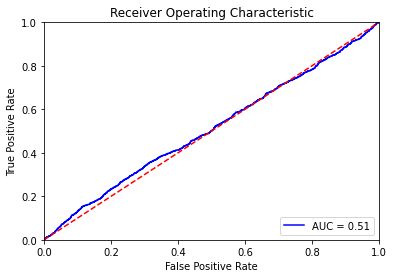

In [45]:
%matplotlib inline

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs1 = mlr1.predict_proba(x_test_real)
preds1 = probs1[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test_real, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Build a model to predict credit default using the anonymized dataset

In [46]:
import pandas as pd

data_anonymized = pd.read_csv('dataset_anonymized_DB_INC.csv')

data_anonymized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  object 
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  object 
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [47]:
data_anonymized.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,has_missed_loans
0,*,F,N,N,"[0, 2[",270000.0,Commercia***********,Higher education,C*******************,House / apartment,-11852,-2469,1,0,0,0,********************,"[1, 4[",False
1,*,F,N,N,"[0, 2[",315000.0,Commercia***********,Higher education,C*******************,House / apartment,-10450,-248,1,0,0,0,********************,"[1, 4[",False
2,*,F,N,Y,"[0, 2[",135000.0,Commercia***********,Higher education,C*******************,House / apartment,-10091,-1525,1,0,0,1,********************,"[1, 4[",True
3,*,F,N,Y,"[0, 2[",135000.0,Commercia***********,Higher education,C*******************,House / apartment,-10091,-1525,1,0,0,1,********************,"[1, 4[",False
4,*,F,N,Y,"[0, 2[",135000.0,Commercia***********,Higher education,C*******************,House / apartment,-10091,-1525,1,0,0,1,********************,"[1, 4[",False


#### Prepare dataset

In [48]:
data_anonymized['has_missed_loans'].replace({True:1, False:0}, inplace=True)

In [49]:
data_anonymized['has_missed_loans'].value_counts()

0    32002
1     4455
Name: has_missed_loans, dtype: int64

In [50]:
data_anonymized

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,has_missed_loans
0,*,F,N,N,"[0, 2[",270000.0,Commercia***********,Higher education,C*******************,House / apartment,-11852,-2469,1,0,0,0,********************,"[1, 4[",0
1,*,F,N,N,"[0, 2[",315000.0,Commercia***********,Higher education,C*******************,House / apartment,-10450,-248,1,0,0,0,********************,"[1, 4[",0
2,*,F,N,Y,"[0, 2[",135000.0,Commercia***********,Higher education,C*******************,House / apartment,-10091,-1525,1,0,0,1,********************,"[1, 4[",1
3,*,F,N,Y,"[0, 2[",135000.0,Commercia***********,Higher education,C*******************,House / apartment,-10091,-1525,1,0,0,1,********************,"[1, 4[",0
4,*,F,N,Y,"[0, 2[",135000.0,Commercia***********,Higher education,C*******************,House / apartment,-10091,-1525,1,0,0,1,********************,"[1, 4[",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,*,*,N,Y,*,337500.0,*,*,*,House / apartment,-12555,-2769,1,0,0,0,*,*,0
36453,*,*,N,Y,*,337500.0,*,*,*,House / apartment,-12555,-2769,1,0,0,0,*,*,0
36454,*,*,N,Y,*,135000.0,*,*,*,House / apartment,-17489,-7557,1,0,1,0,*,*,0
36455,*,*,N,Y,*,135000.0,*,*,*,House / apartment,-17489,-7557,1,0,1,0,*,*,0


In [51]:
data_anonymized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  object 
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  object 
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [52]:
data_anonymized=pd.get_dummies(data_anonymized)

In [54]:
data_anonymized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   36457 non-null  float64
 1   DAYS_BIRTH                                         36457 non-null  int64  
 2   DAYS_EMPLOYED                                      36457 non-null  int64  
 3   FLAG_MOBIL                                         36457 non-null  int64  
 4   FLAG_WORK_PHONE                                    36457 non-null  int64  
 5   FLAG_PHONE                                         36457 non-null  int64  
 6   FLAG_EMAIL                                         36457 non-null  int64  
 7   has_missed_loans                                   36457 non-null  int64  
 8   ID_*                                               36457 non-null  uint8  
 9   CODE_G

In [57]:
data_anonymized.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,has_missed_loans,ID_*,CODE_GENDER_*,...,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_P********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
0,270000.0,-11852,-2469,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,315000.0,-10450,-248,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,135000.0,-10091,-1525,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,135000.0,-10091,-1525,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,135000.0,-10091,-1525,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
data_anonymized.describe()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,has_missed_loans,ID_*,CODE_GENDER_*,...,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_P********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
count,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.0,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.00000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,0.122199,1.0,0.070000,...,0.000384,0.163947,0.108649,0.005705,0.00107,0.108045,0.001563,0.070000,0.850975,0.079025
std,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.327520,0.0,0.255151,...,0.019593,0.370232,0.311202,0.075319,0.03269,0.310442,0.039511,0.255151,0.356118,0.269781
min,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analyse correlations between anonymized variables

In [59]:
correlations_anonymized = data_anonymized.corr()

In [60]:
correlations_anonymized

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,has_missed_loans,ID_*,CODE_GENDER_*,...,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_P********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
AMT_INCOME_TOTAL,1.000000,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,0.014412,NaN,0.040703,...,0.010163,-0.038147,0.207821,0.003654,0.022705,-0.044703,-0.023777,0.040703,-0.034646,0.007238
DAYS_BIRTH,0.067908,1.000000,-0.616213,NaN,0.179054,-0.028659,0.105625,0.002712,NaN,0.098151,...,0.021749,0.135938,0.041584,0.023606,0.015228,0.125578,0.004507,0.098151,-0.212484,0.187656
DAYS_EMPLOYED,-0.168611,-0.616213,1.000000,NaN,-0.242869,-0.007233,-0.085648,0.000637,NaN,-0.090708,...,-0.008681,-0.199322,-0.158644,-0.034084,-0.014897,-0.154588,-0.017513,-0.090708,0.161817,-0.127814
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.037746,0.179054,-0.242869,NaN,1.000000,0.311644,-0.034838,0.003263,NaN,0.036902,...,-0.007227,0.037588,0.042115,-0.008635,-0.003605,0.024451,0.001902,0.036902,-0.067955,0.054802
FLAG_PHONE,0.017245,-0.028659,-0.007233,NaN,0.311644,1.000000,0.010455,0.005622,NaN,-0.000086,...,0.018032,-0.026827,-0.000532,0.015718,-0.008277,-0.003346,-0.005793,-0.000086,-0.008325,0.011070
FLAG_EMAIL,0.086681,0.105625,-0.085648,NaN,-0.034838,0.010455,1.000000,-0.008707,NaN,0.022958,...,0.008543,-0.025217,0.030414,0.019545,0.010279,0.008529,-0.012424,0.022958,-0.012274,-0.005511
has_missed_loans,0.014412,0.002712,0.000637,NaN,0.003263,0.005622,-0.008707,1.000000,NaN,-0.011440,...,-0.007313,0.013486,-0.004045,0.005096,0.015972,-0.013042,-0.002046,-0.011440,0.015029,-0.009020
ID_*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER_*,0.040703,0.098151,-0.090708,NaN,0.036902,-0.000086,0.022958,-0.011440,NaN,1.000000,...,-0.005377,-0.121491,-0.095785,-0.020782,-0.008978,-0.095486,-0.010857,1.000000,-0.655598,-0.080365


In [61]:
correlations_anonymized[correlations_anonymized>0.8]

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,has_missed_loans,ID_*,CODE_GENDER_*,...,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_P********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
AMT_INCOME_TOTAL,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_PHONE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_missed_loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER_*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


After analysing the correlations we have decided to remove the variables with a correlation higher 0.8 in order to avoid multicolinearity issues. So we have decided to remove the variable CNT_CHILDREN_* and CNT_CHILDREN_[0, 2[ because it has correlation higher than 0.9 with the variable CNT_FAM_MEMBERS. The variable NAME_INCCOME_TYPE_PENSIONER is also higly correlated (0.99) with the variable DAYS_EMPLOYED so we decide to remove the variable OCUPATION_TYPE_PENSIONER.

We also will exclude the variable FLAG_MOBIL because this variable is always 1 and ID*.

#### Define the target

In [62]:
y_anonymized = data_anonymized['has_missed_loans']

In [63]:
y_anonymized

0        0
1        0
2        1
3        0
4        0
        ..
36452    0
36453    0
36454    0
36455    0
36456    0
Name: has_missed_loans, Length: 36457, dtype: int64

#### Define the explanatory variables

In [64]:
x_anonymized = data_anonymized.drop(columns=['has_missed_loans','ID_*', 'FLAG_MOBIL', 'CNT_CHILDREN_*', 'CNT_CHILDREN_[0, 2[','OCCUPATION_TYPE_P********************' ])

In [65]:
x_anonymized

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_*,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,...,OCCUPATION_TYPE_H********************,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
0,270000.0,-11852,-2469,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,315000.0,-10450,-248,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,135000.0,-10091,-1525,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,135000.0,-10091,-1525,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,135000.0,-10091,-1525,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,337500.0,-12555,-2769,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
36453,337500.0,-12555,-2769,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
36454,135000.0,-17489,-7557,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
36455,135000.0,-17489,-7557,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Define the training and test datasets for our anonymized dataset

In [66]:
from sklearn.model_selection import train_test_split

x_anonymized_train, x_anonymized_test, y_anonymized_train, y_anonymized_test = train_test_split(x_anonymized, y_anonymized, test_size = 0.4, random_state=42)

In [67]:
x_anonymized_train

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_*,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,...,OCCUPATION_TYPE_H********************,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
34627,180000.0,-12240,-4663,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29597,121500.0,-16471,-2745,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
24447,157500.0,-10586,-279,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
31668,270000.0,-13805,-1557,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
23609,315000.0,-19441,-4064,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,157500.0,-20831,-1142,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6265,360000.0,-12387,-338,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
11284,79650.0,-16081,365243,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
860,108000.0,-22849,365243,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [68]:
 x_anonymized_test

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_*,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,...,OCCUPATION_TYPE_H********************,OCCUPATION_TYPE_I********************,OCCUPATION_TYPE_L********************,OCCUPATION_TYPE_M********************,OCCUPATION_TYPE_R********************,OCCUPATION_TYPE_S********************,OCCUPATION_TYPE_W********************,CNT_FAM_MEMBERS_*,"CNT_FAM_MEMBERS_[1, 4[","CNT_FAM_MEMBERS_[4, 8["
21900,135000.0,-9594,-866,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
24293,144000.0,-17001,-5004,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
19633,180000.0,-11089,-1467,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2496,315000.0,-11025,-2065,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
25932,180000.0,-16289,-3049,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20023,117000.0,-9409,-1029,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
20178,157500.0,-14425,-4568,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
25916,108000.0,-17209,-1081,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
23919,202500.0,-14060,-261,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [69]:
y_anonymized_train

34627    0
29597    0
24447    0
31668    1
23609    0
        ..
16850    0
6265     1
11284    0
860      0
15795    0
Name: has_missed_loans, Length: 21874, dtype: int64

In [70]:
y_anonymized_test

21900    0
24293    0
19633    0
2496     0
25932    0
        ..
20023    0
20178    0
25916    0
23919    0
3277     0
Name: has_missed_loans, Length: 14583, dtype: int64

#### Multivariate Logistic Regression for our anonymized dataset

In [71]:
%matplotlib widget
from sklearn.linear_model import LogisticRegression


mlr2 = LogisticRegression()
mlr2.fit(x_anonymized_train, y_anonymized_train)
y_anonymized_pred = mlr2.predict( x_anonymized_test)

In [72]:
y_anonymized_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
mlr2.classes_

array([0, 1])

#### Model Evaluation Measures

In [75]:
lr_score_anonymized = evaluatemodelscore(y_anonymized_test, y_anonymized_pred)

MAE: 0.12020846190770075
MSE: 0.12020846190770075
RMSE: 0.3467109197987579
ACCURACY: 0.8797915380922993


In [76]:
lr_res_anonymized = pd.DataFrame({
    'Model': ['Linear Regression Anonymized'],
    'Test MAE': lr_score_anonymized['mae'],
    'Test MSE': lr_score_anonymized['mse'],
    'Test RMSE': lr_score_anonymized['rmse'],
    'Test ACCURACY': lr_score_anonymized['accuracy']
})

r1=lr_res_real.append(lr_res_anonymized, ignore_index = True)

In [77]:
r1

,Model,Test MAE,Test MSE,Test RMSE,Test ACCURACY
0,Linear Regression Original,0.126174,0.126174,0.355210,0.873826
1,Linear Regression Anonymized,0.120208,0.120208,0.346711,0.879792


We have achieved a higher accuracy with the data anonymed because instead of loosing all the information regarding the number of children, we were able to use an interval.

#### AUC

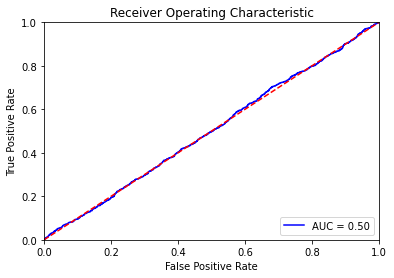

In [78]:
%matplotlib inline

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs2 = mlr2.predict_proba(x_anonymized_test)
preds2 = probs2[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_anonymized_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Synthetic Data

#### Necessary Constraints
Our synthetic data has to respect the following conditions:

Specify ID as a primary Key. Days since birth has to be lower (because 0 is today) than the number of work days and we should not have individuals working with age lower than 16 years old.
Work Phone implies that the individual is not unemployed which means that the number of days employed is negative.
Days employed must be lower than days since birth and must have at least 16 years old. Pensioners have positive work days and do not have information regarding their occupation type. 

#### Generate synthetic data

In [79]:
import pandas as pd

data = pd.read_csv('loan_defaults.csv')

data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,has_missed_loans
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,False
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,False
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,True


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [81]:
!pip install sdv

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [82]:
from sdv.constraints import create_custom_constraint, Inequality, Unique

In [83]:
unique_id = Unique(column_names = ['ID'])

In [84]:
# num dias a trabalhar > num dias vivo
age_gt_age_when_joined_constraint = Inequality(
    low_column_name='DAYS_BIRTH',
    high_column_name='DAYS_EMPLOYED'
    )

In [85]:
def no_children_working_is_valid(column_names, data, working_age_years):
    # assumes column_names[0] has column of DAYS_BIRTH
    # assumes column_names[1] has column of DAYS_EMPLOYED
    days_birth = data[column_names[0]]
    days_employed = data[column_names[1]]
    
    days_employed_working_age = -working_age_years * 365
    
    return (days_birth - days_employed) <  days_employed_working_age


NoChildWorkerConstraint = create_custom_constraint(
    is_valid_fn=no_children_working_is_valid
)

In [86]:
def no_unemployed_work_phones_is_valid(column_names, data):
    # assumes column_names[0] has column of DAYS_EMPLOYED
    # assumes column_names[1] has column of FLAG_WORK_PHONE
    unemployed = data[column_names[0]] > 0
    flag_work_phone = data[column_names[1]] == 1
    
    return ~(unemployed & flag_work_phone)


NoUmemployedWorkPhoneConstraint = create_custom_constraint(
    is_valid_fn=no_unemployed_work_phones_is_valid
)

In [87]:
def no_col1_gt_col2_not_match_is_valid(column_names, data, gt_val, match_val):
    ''' this constraint makes sure that all rows that have 
            column 0 over gt_val AND
            col 1 with a value different from match_val
        don't exist
    '''
    col1_gt = data[column_names[0]] > gt_val
    col2_match = data[column_names[1]] != match_val
    
    return ~(col1_gt & col2_match)


NotColumn1GtColumn2NotMatchConstraint = create_custom_constraint(
    is_valid_fn=no_col1_gt_col2_not_match_is_valid
)

In [88]:
def no_col1_gt_col2_match_is_valid(column_names, data, gt_val, match_val):
    ''' this constraint makes sure that all rows that have 
            column 0 over gt_val AND
            col 1 with a value equal to match_val
        don't exist
    '''
    col1_gt = data[column_names[0]] > gt_val
    col2_match = data[column_names[1]] == match_val
    
    return ~(col1_gt & col2_match)


NotColumn1GtColumn2MatchConstraint = create_custom_constraint(
    is_valid_fn=no_col1_gt_col2_match_is_valid
)

In [89]:
def no_col1_gt_col2_na_is_valid(column_names, data, gt_val):
    ''' this constraint makes sure that all rows that have 
            column 0 over gt_val AND
            col 1 with a value different from nan
        don't exist
    '''
    col1_gt = data[column_names[0]] > gt_val
    col2_match = ~data[column_names[1]].isna()
    
    return ~(col1_gt & col2_match)


NotColumn1GtColumn2NaConstraint = create_custom_constraint(
    is_valid_fn=no_col1_gt_col2_na_is_valid
)

In [90]:
no_clients_worked_before_age_X = NoChildWorkerConstraint(column_names=['DAYS_BIRTH', 'DAYS_EMPLOYED'], working_age_years=16)
positive_days_employed_dont_have_work_phones = NotColumn1GtColumn2MatchConstraint(column_names=['DAYS_EMPLOYED', 'FLAG_WORK_PHONE'], gt_val=0, match_val=1)
positive_days_employed_are_pensioners = NotColumn1GtColumn2NotMatchConstraint(column_names=['DAYS_EMPLOYED', 'NAME_INCOME_TYPE'], gt_val=0, match_val='Pensioner')
positive_days_employed_are_na_occupation = NotColumn1GtColumn2NaConstraint(column_names=['DAYS_EMPLOYED', 'OCCUPATION_TYPE'], gt_val=0)

In [91]:
constraints = [
    unique_id,
    age_gt_age_when_joined_constraint,
    no_clients_worked_before_age_X,
#    NoUmemployedWorkPhoneConstraint(column_names=['DAYS_EMPLOYED', 'FLAG_WORK_PHONE']),
    positive_days_employed_dont_have_work_phones,
    positive_days_employed_are_pensioners,
    positive_days_employed_are_na_occupation
]


In [92]:
from sdv.tabular import CTGAN

model = CTGAN(primary_key='ID', 
             constraints=constraints)

In [93]:
model.fit(data)

In [96]:
synthetic_data = model.sample(num_rows=36457)

Sampling rows: 100%|██████████| 36457/36457 [00:11<00:00, 3224.23it/s] 


In [97]:
synthetic_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000
mean,18296.223140,0.402858,1.862484e+05,-16610.102148,54263.606578,1.0,0.283348,0.421565,0.104671,2.133609
std,10581.540435,0.684763,1.043449e+05,4221.631066,135310.927862,0.0,0.450630,0.493816,0.306134,0.904512
min,0.000000,0.000000,2.700000e+04,-25152.000000,-18365.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,9115.000000,0.000000,1.165165e+05,-20353.000000,-4757.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,18294.000000,0.000000,1.604901e+05,-16528.000000,-2856.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,27462.000000,1.000000,2.311093e+05,-12851.000000,-968.000000,1.0,1.000000,1.000000,0.000000,3.000000
max,36722.000000,3.000000,1.099069e+06,-7770.000000,409936.000000,1.0,1.000000,1.000000,1.000000,5.000000


### Synthetic Data Validation Check 

Let's validade if the model respected the condition that ID has to be unique.

In [98]:
synthetic_data.ID.value_counts().max()

1

Yes, the model does not repeat IDs. So we ca save our model. We still have to guarantee that other caracteristics of our data were respected during the generation of our model.

In [99]:
data['has_missed_loans'].value_counts()

False    32002
True      4455
Name: has_missed_loans, dtype: int64

In [100]:
synthetic_data['has_missed_loans'].value_counts()

False    32298
True      4159
Name: has_missed_loans, dtype: int64

Having a work phone number should imply that the individual is working and our model was able to learn this pattern as shown below. 

In [101]:
data[data['FLAG_WORK_PHONE']==1].describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,8.222000e+03,8222.000000,8.222000e+03,8222.000000,8222.000000,8222.0,8222.0,8222.000000,8222.000000,8222.000000
mean,5.084374e+06,0.496473,1.795658e+05,-14581.412308,-2688.588786,1.0,1.0,0.558137,0.071272,2.307468
std,4.044567e+04,0.800453,9.852856e+04,3509.382552,2344.564008,0.0,0.0,0.496639,0.257295,0.947517
min,5.008804e+06,0.000000,2.700000e+04,-23700.000000,-14413.000000,1.0,1.0,0.000000,0.000000,1.000000
25%,5.050536e+06,0.000000,1.125000e+05,-17279.000000,-3577.000000,1.0,1.0,0.000000,0.000000,2.000000
50%,5.090908e+06,0.000000,1.575000e+05,-14247.500000,-2087.000000,1.0,1.0,1.000000,0.000000,2.000000
75%,5.117472e+06,1.000000,2.250000e+05,-11617.000000,-982.000000,1.0,1.0,1.000000,0.000000,3.000000
max,5.150478e+06,19.000000,1.125000e+06,-7705.000000,-65.000000,1.0,1.0,1.000000,1.000000,20.000000


In [102]:
synthetic_data[synthetic_data['FLAG_WORK_PHONE']==1].describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,10330.000000,10330.000000,1.033000e+04,10330.000000,10330.000000,10330.0,10330.0,10330.000000,10330.000000,10330.000000
mean,18321.674637,0.452856,1.807944e+05,-15413.132139,-3757.818683,1.0,1.0,0.588480,0.075992,2.225944
std,10525.530182,0.676675,1.055798e+05,3722.191595,2441.557734,0.0,0.0,0.492133,0.264999,0.885149
min,0.000000,0.000000,3.445130e+04,-25034.000000,-15953.000000,1.0,1.0,0.000000,0.000000,1.000000
25%,9254.250000,0.000000,1.143687e+05,-18469.000000,-5057.750000,1.0,1.0,0.000000,0.000000,2.000000
50%,18453.500000,0.000000,1.431629e+05,-14564.000000,-3429.000000,1.0,1.0,1.000000,0.000000,2.000000
75%,27377.250000,1.000000,2.269687e+05,-12368.000000,-1992.000000,1.0,1.0,1.000000,0.000000,3.000000
max,36722.000000,3.000000,1.069584e+06,-7770.000000,0.000000,1.0,1.0,1.000000,1.000000,5.000000


The maximum age in our synthetic dataset is 69 years old and the youngest client has 19 years old, very similar with our original dataset where the maximum age is 69 years old and the minimum 20 years old. We didnt constraint the age with a maximum and a minimum because our synthetic dataset is respecting already this limitation.

In [103]:
data.DAYS_BIRTH.describe()

count    36457.000000
mean    -15975.173382
std       4200.549944
min     -25152.000000
25%     -19438.000000
50%     -15563.000000
75%     -12462.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [104]:
synthetic_data.DAYS_BIRTH.describe()

count    36457.000000
mean    -16610.102148
std       4221.631066
min     -25152.000000
25%     -20353.000000
50%     -16528.000000
75%     -12851.000000
max      -7770.000000
Name: DAYS_BIRTH, dtype: float64

Check if the number of days employed is higher than the number of days since birth

In [105]:
check2_data = data['DAYS_BIRTH'] - data['DAYS_EMPLOYED']

In [106]:
check2_data.describe()

count     36457.00000
mean     -75238.10895
std      140278.78451
min     -390395.00000
25%      -17167.00000
50%      -12730.00000
75%       -9696.00000
max       -6547.00000
dtype: float64

The days employed variable is not only lower than the days of birth but also, individuals are more than 17 years old when employed.NMow let's check if our synthetic data was able to learn this pattern.

In [107]:
check2_synthetic_data = synthetic_data['DAYS_BIRTH'] - synthetic_data['DAYS_EMPLOYED']

In [108]:
check2_synthetic_data.describe()

count     36457.000000
mean     -70873.708725
std      137438.854709
min     -432540.000000
25%      -16915.000000
50%      -12253.000000
75%       -9201.000000
max       -5850.000000
dtype: float64

Our synthetic data respect this condition.

In [152]:
synthetic_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,18296.223140,0.402858,1.862484e+05,-16610.102148,54263.606578,1.0,0.283348,0.421565,0.104671,2.133609,...,0.185369,0.002798,0.054832,0.022959,0.005980,0.001207,0.085964,0.003346,0.033190,0.002222
std,10581.540435,0.684763,1.043449e+05,4221.631066,135310.927862,0.0,0.450630,0.493816,0.306134,0.904512,...,0.388602,0.052821,0.227655,0.149773,0.077098,0.034720,0.280315,0.057752,0.179134,0.047084
min,0.000000,0.000000,2.700000e+04,-25152.000000,-18365.000000,1.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9115.000000,0.000000,1.165165e+05,-20353.000000,-4757.000000,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18294.000000,0.000000,1.604901e+05,-16528.000000,-2856.000000,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27462.000000,1.000000,2.311093e+05,-12851.000000,-968.000000,1.0,1.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36722.000000,3.000000,1.099069e+06,-7770.000000,409936.000000,1.0,1.000000,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


### Let's Save our Synthetic Data Model 

In [109]:
import pickle

model.save('synthetic_dataset.pkl')

AttributeError: Can't pickle local object 'create_custom_constraint.<locals>.CustomConstraint'

### Evaluating Synthetic Data

In [110]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [112]:
from sdv.evaluation import evaluate

evaluate(synthetic_data, data)

0.5597955030608549

The output of this function call will be a number between 0 and 1 that will indicate how similar the two tables are, being 0 the worst and 1 the best possible score, so, this means that we could improve our synthetic data.

In [114]:
evaluate(synthetic_data, data, metrics=['CSTest', 'KSTest'])

0.9037276082426604

In [115]:
evaluate(synthetic_data, data, metrics=['CSTest', 'KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.972954,0.972954,0.0,1.0,MAXIMIZE,None
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.834501,0.834501,0.0,1.0,MAXIMIZE,None


-   `cstest`: This metric compares the distributions of all the
    categorical columns of the table by using a Chi-squared test and
    returns the average of the `p-values` obtained across all the
    columns. If the tables that you are evaluating do not contain any
    categorical columns the result will be `nan`.
-   `kstest`: This metric compares the distributions of all the
    numerical columns of the table with a two-sample Kolmogorov-Smirnov
    test using the empirical CDF and returns the average of the
    KS statistic values obtained across all the columns. If the tables
    that you are evaluating do not contain any numerical columns the result
    will be `nan`.

## Build a model to predict credit default using the synthetic data

#### Prepare dataset

In [120]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [121]:
synthetic_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,has_missed_loans
0,1,M,N,Y,0,103631.4,Pensioner,Lower secondary,Separated,House / apartment,-23243,333572,1,0,0,0,NaN,1.0,True
1,2,F,N,N,0,114686.5,Working,Secondary / secondary special,Married,House / apartment,-12726,-4914,1,0,0,0,Laborers,2.0,False
2,3,M,Y,N,0,164688.5,Commercial associate,Higher education,Married,House / apartment,-10407,-2117,1,0,0,0,Core staff,4.0,True
3,4,F,Y,Y,1,198640.7,Working,Incomplete higher,Married,House / apartment,-17290,-2166,1,1,1,0,Accountants,2.0,False
4,5,F,N,Y,0,101583.1,Pensioner,Secondary / secondary special,Widow,House / apartment,-23575,369771,1,0,0,0,NaN,1.0,True


In [122]:
synthetic_data['has_missed_loans'].value_counts()

False    32298
True      4159
Name: has_missed_loans, dtype: int64

In [123]:
synthetic_data['has_missed_loans'].replace({True:1, False:0}, inplace=True)

In [124]:
synthetic_data['has_missed_loans'].astype(int)

0        1
1        0
2        1
3        0
4        1
        ..
36452    0
36453    0
36454    0
36455    0
36456    0
Name: has_missed_loans, Length: 36457, dtype: int64

In [125]:
synthetic_data['has_missed_loans'].value_counts()

0    32298
1     4159
Name: has_missed_loans, dtype: int64

In [126]:
synthetic_data=pd.get_dummies(synthetic_data)

In [127]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   CNT_CHILDREN                                       36457 non-null  int64  
 2   AMT_INCOME_TOTAL                                   36457 non-null  float64
 3   DAYS_BIRTH                                         36457 non-null  int64  
 4   DAYS_EMPLOYED                                      36457 non-null  int64  
 5   FLAG_MOBIL                                         36457 non-null  int64  
 6   FLAG_WORK_PHONE                                    36457 non-null  int64  
 7   FLAG_PHONE                                         36457 non-null  int64  
 8   FLAG_EMAIL                                         36457 non-null  int64  
 9   CNT_FA

In [128]:
synthetic_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,18296.223140,0.402858,1.862484e+05,-16610.102148,54263.606578,1.0,0.283348,0.421565,0.104671,2.133609,...,0.185369,0.002798,0.054832,0.022959,0.005980,0.001207,0.085964,0.003346,0.033190,0.002222
std,10581.540435,0.684763,1.043449e+05,4221.631066,135310.927862,0.0,0.450630,0.493816,0.306134,0.904512,...,0.388602,0.052821,0.227655,0.149773,0.077098,0.034720,0.280315,0.057752,0.179134,0.047084
min,0.000000,0.000000,2.700000e+04,-25152.000000,-18365.000000,1.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9115.000000,0.000000,1.165165e+05,-20353.000000,-4757.000000,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18294.000000,0.000000,1.604901e+05,-16528.000000,-2856.000000,1.0,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27462.000000,1.000000,2.311093e+05,-12851.000000,-968.000000,1.0,1.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36722.000000,3.000000,1.099069e+06,-7770.000000,409936.000000,1.0,1.000000,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analyse correlations between variables

In [129]:
synthetic_correlations= synthetic_data.corr()

In [130]:
synthetic_correlations

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
ID,1.000000,0.002587,0.001696,0.000886,0.003190,NaN,0.001512,-0.002136,-0.002582,-0.000538,...,-0.000249,-0.008562,0.003443,-0.008840,0.001354,0.008430,-0.000363,-0.003105,-0.007020,-0.010868
CNT_CHILDREN,0.002587,1.000000,-0.041937,0.355366,-0.213159,NaN,0.045911,0.037272,0.029009,0.727710,...,0.022934,-0.017512,0.004168,-0.005133,0.008405,0.007239,0.033074,0.008220,-0.042367,-0.011597
AMT_INCOME_TOTAL,0.001696,-0.041937,1.000000,-0.007328,-0.125307,NaN,-0.032866,0.007288,0.092494,-0.041886,...,-0.000698,-0.001342,0.204834,-0.051005,0.010840,-0.008497,-0.049061,-0.007814,0.033849,0.003744
DAYS_BIRTH,0.000886,0.355366,-0.007328,1.000000,-0.492417,NaN,0.178285,-0.026599,0.100860,0.292726,...,0.123114,-0.010002,0.009158,0.040260,-0.004836,-0.002942,0.159424,0.008257,-0.034088,0.027104
DAYS_EMPLOYED,0.003190,-0.213159,-0.125307,-0.492417,1.000000,NaN,-0.269629,0.076410,-0.072346,-0.194905,...,-0.204301,-0.022800,-0.103091,-0.066211,-0.033310,-0.014861,-0.130138,-0.024895,-0.078798,-0.020060
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.001512,0.045911,-0.032866,0.178285,-0.269629,NaN,1.000000,0.212540,-0.058907,0.064189,...,0.081005,0.018552,0.038928,0.040170,-0.014030,0.006194,0.022581,0.024697,0.044905,-0.005108
FLAG_PHONE,-0.002136,0.037272,0.007288,-0.026599,0.076410,NaN,0.212540,1.000000,0.023644,0.026318,...,-0.077752,0.004207,-0.005053,-0.001799,-0.000649,-0.000878,-0.029166,-0.002338,-0.033209,-0.019049
FLAG_EMAIL,-0.002582,0.029009,0.092494,0.100860,-0.072346,NaN,-0.058907,0.023644,1.000000,0.024285,...,-0.004466,-0.001148,0.021947,0.019378,0.006022,-0.001563,-0.039010,-0.005849,-0.038841,-0.002813
CNT_FAM_MEMBERS,-0.000538,0.727710,-0.041886,0.292726,-0.194905,NaN,0.064189,0.026318,0.024285,1.000000,...,0.044331,-0.012991,0.034890,-0.025276,0.004277,0.013208,0.012038,0.002468,-0.031601,-0.022428


In [131]:
synthetic_correlations[synthetic_correlations>0.8]

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_PHONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_FAM_MEMBERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Define the target

In [132]:
y_synthetic = synthetic_data['has_missed_loans']

In [133]:
y_synthetic

0        1
1        0
2        1
3        0
4        1
        ..
36452    0
36453    0
36454    0
36455    0
36456    0
Name: has_missed_loans, Length: 36457, dtype: int64

#### Define the explanatory variables

In [134]:
x_synthetic = synthetic_data.drop(columns=['has_missed_loans', 'FLAG_MOBIL', 'NAME_INCOME_TYPE_Pensioner'])

In [135]:
x_synthetic

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,0,103631.4,-23243,333572,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,114686.5,-12726,-4914,0,0,0,2.0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,0,164688.5,-10407,-2117,0,0,0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,198640.7,-17290,-2166,1,1,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,101583.1,-23575,369771,0,0,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,36718,0,413660.0,-22336,-5871,1,1,0,1.0,0,...,0,0,1,0,0,0,0,0,0,0
36453,36719,1,93160.8,-17014,-4573,0,0,0,3.0,1,...,0,0,0,1,0,0,0,0,0,0
36454,36720,0,102078.7,-15752,-2458,1,1,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
36455,36721,0,307874.9,-21947,-3745,1,1,0,2.0,0,...,1,0,0,0,0,0,0,0,0,0


#### Define the training and test datasets for our synthetic dataset

In [136]:
from sklearn.model_selection import train_test_split

x_synthetic_train, x_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(x_synthetic, y_synthetic, test_size = 0.4, random_state=42)

In [137]:
x_synthetic_train

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
34627,30966,2,222518.8,-14302,-5736,1,1,0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
29597,36210,0,378448.3,-16832,-1424,0,0,1,1.0,0,...,1,0,0,0,0,0,0,0,0,0
24447,29899,0,126616.2,-19018,-774,1,1,0,1.0,1,...,0,0,0,0,0,0,1,0,0,0
31668,11077,0,97860.4,-11594,-3060,1,0,0,2.0,0,...,1,0,0,0,0,0,0,0,0,0
23609,28870,0,265547.5,-22377,-350,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,20644,0,167933.0,-18944,346931,0,1,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
6265,7657,0,269101.1,-11802,-4360,0,1,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
11284,13773,0,260063.2,-22799,-2346,0,1,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
860,1051,0,227629.6,-19132,-1027,1,0,0,2.0,0,...,1,0,0,0,0,0,0,0,0,0


In [138]:
x_synthetic_test

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
21900,26776,1,166139.5,-17751,-6653,0,0,0,5.0,1,...,0,0,0,0,0,0,0,0,0,0
24293,29711,0,136503.1,-21608,383706,0,1,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
19633,24025,0,76782.8,-19422,-3809,0,0,0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
2496,3033,0,138587.5,-18009,-8675,0,1,0,1.0,1,...,0,0,0,0,0,0,1,0,0,0
25932,31713,0,186613.2,-11605,-1522,1,0,0,2.0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20023,24508,0,152134.0,-10554,-879,0,0,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
20178,24699,0,210436.1,-12989,-2948,0,0,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
25916,31690,0,240284.3,-16490,-2899,0,1,0,2.0,1,...,0,0,1,0,0,0,0,0,0,0
23919,29254,1,262474.7,-12144,-1259,0,0,1,3.0,1,...,0,0,0,0,0,0,0,0,0,0


In [139]:
y_synthetic_train

34627    0
29597    0
24447    0
31668    0
23609    1
        ..
16850    0
6265     0
11284    0
860      0
15795    0
Name: has_missed_loans, Length: 21874, dtype: int64

In [140]:
y_synthetic_test

21900    0
24293    0
19633    0
2496     0
25932    0
        ..
20023    0
20178    0
25916    0
23919    0
3277     0
Name: has_missed_loans, Length: 14583, dtype: int64

#### Multivariate Logistic Regression for our synthetic dataset

In [141]:
!pip install ipympl

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [142]:
%matplotlib widget


from sklearn.linear_model import LogisticRegression

mlr3 = LogisticRegression()
mlr3.fit(x_synthetic_train, y_synthetic_train)

y_synthetic_pred = mlr3.predict( x_synthetic_test) 

In [143]:
y_synthetic_pred

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
mlr3.classes_

array([0, 1])

#### Model Evaluation Measures

In [145]:
lr_score_synthetic = evaluatemodelscore(y_synthetic_test, y_synthetic_pred)

MAE: 0.11602550915449496
MSE: 0.11602550915449496
RMSE: 0.340625173988205
ACCURACY: 0.8839744908455051


In [146]:
lr_res_synthetic = pd.DataFrame({
    'Model': ['Linear Regression Synthetic'],
    'Test MAE': lr_score_synthetic['mae'],
    'Test MSE': lr_score_synthetic['mse'],
    'Test RMSE': lr_score_synthetic['rmse'],
    'Test ACCURACY': lr_score_synthetic['accuracy']
})

r2=r1.append(lr_res_synthetic, ignore_index = True)

In [147]:
r2

,Model,Test MAE,Test MSE,Test RMSE,Test ACCURACY
0,Linear Regression Original,0.126174,0.126174,0.355210,0.873826
1,Linear Regression Anonymized,0.120208,0.120208,0.346711,0.879792
2,Linear Regression Synthetic,0.116026,0.116026,0.340625,0.883974


We have achieved a higher accuracy synthetic probably due to the fact that we were able to kept the variable number of children. We were able to preserve this variable because the correlation with the number of family members was lower than 0.8, nevertheless, this means that probably the constrains related with this variable could be improved.

#### AUC

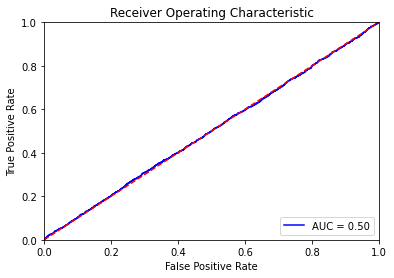

In [149]:
%matplotlib inline

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs3 = mlr3.predict_proba(x_synthetic_test)
preds3 = probs3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_synthetic_test, preds3)
roc_auc3 = metrics.auc(fpr3, tpr3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

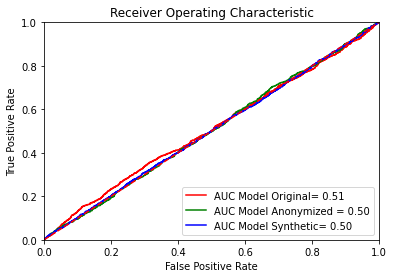

In [151]:
%matplotlib inline

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs3 = mlr.predict_proba(x_synthetic_test)
#preds3 = probs[:,1]
#fpr3, tpr3, threshold3 = metrics.roc_curve(y_synthetic_test, preds3)
#roc_auc = metrics.auc(fpr3, tpr3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'r', label = 'AUC Model Original= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC Model Anonymized = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'b', label = 'AUC Model Synthetic= %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The model with the higher AUC is the model generated with the original data, nevertheless, the results are very similar.